<a href="https://colab.research.google.com/github/molabokchi/bokchi_open_lab/blob/main/deepdriver_test_prod_comm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 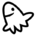 deepdriver quickstart!

welecome to deepdriver! 😀

You can refer to the guide document.
https://bokchi.gitbook.io/deepdriver-ce/

# 0. 💻 install deepdriver

In [1]:
pip install deepdriver==0.0.48

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 46 kB 2.9 MB/s 
     |████████████████████████████████| 2.4 MB 24.7 MB/s 
     |████████████████████████████████| 409 kB 69.5 MB/s 
  Created wheel for assertpy: filename=assertpy-1.1-py3-none-any.whl size=42917 sha256=5297bbb54dac83c85a0ebe6614594a1229b837ad337be80e20b2cfe57db0f242
  Stored in directory: /root/.cache/pip/wheels/57/86/c9/1310be6ddfb540daa0bf1ac204526837aa0a8b0e79f32855ff
Successfully built assertpy
  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.19.6
    Uninstalling protobuf-3.19.6:
      Successfully uninstalled protobuf-3.19.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.9.2 requires protobuf<3.20,>=3.9.2, but you have protobuf 4.21.11 which is incompatible.
te

#1. ➕ import deepdriver



In [3]:
import deepdriver

#2. ⚙ deepdriver server setting

In [4]:
deepdriver.setting(http_host="43.201.114.237:9011" ,grpc_host="43.201.114.237:19051")

#3. 🔌 log in to deepdriver

In [6]:
deepdriver.login(key="NTJhNDNiMGIwN2Q1MGE2MmIzMWJlOWEzNWJlOTlkZWFkYmUyNmExYTE4YmQzODliMmRhODdiYTA3ZTQ4NjE1OQ==")

True

#4. 🥼 create experiment and run

In [7]:
epoch =10

In [8]:
def make_exp_name():
  import socket
  from datetime import datetime
  host_name = socket.gethostname()
  date = datetime.today().strftime("%Y%m%d") 

  return "exp" + "_" +host_name +"_"+date

In [9]:
# experiment init & config hyperparam
deepdriver.init(exp_name= make_exp_name(), 
                config={ 'architecture':"CNN", 'epoch': epoch, 'batch_size': 32, 'hidden_layer':128, 'learning_rate':0.01})

2022-12-09 07:49:06,175 INFO [deepdriver] [experiment.py:21] - DeepDriver initialized
Team Name=molamola.babo
Exp Name=exp_e05579b05bc2_20221209
Run Name=range-male-1
Run URL=http://43.201.114.237:9111/experi/molamola.babo/exp_e05579b05bc2_20221209/range-male-1/run/chart


INFO:deepdriver:DeepDriver initialized
Team Name=molamola.babo
Exp Name=exp_e05579b05bc2_20221209
Run Name=range-male-1
Run URL=http://43.201.114.237:9111/experi/molamola.babo/exp_e05579b05bc2_20221209/range-male-1/run/chart


#5. 📚 train your code and send log

In [10]:
import random
accuracy = [ random.uniform(0.7+0.02*i, 1)  for i in range(epoch)]
train_loss = [ random.uniform(0.1,  0.2-0.01*i)  for i in range(epoch)]
val_accuracy =[ random.uniform(0.7+0.02*i, 1)  for i in range(epoch)]
val_loss = [ random.uniform(0.2,  0.3-0.01*i)  for i in range(epoch)]

In [11]:
for i in range(epoch):
    # send train log
    deepdriver.log({'acc': accuracy[i], 'loss': train_loss[i], 'val_acc': val_accuracy[i],'val_loss': val_loss[i]})

#6. ⬆ upload artifact(data)

In [12]:
arti = deepdriver.Artifacts(name="sample",type="dataset")

In [13]:
arti.add("/content/sample_data")

In [14]:
[ent.path for ent  in arti.entry_list]

['anscombe.json',
 'README.md',
 'mnist_train_small.csv',
 'california_housing_test.csv',
 'mnist_test.csv',
 'california_housing_train.csv']

In [15]:
deepdriver.upload_artifact(arti)

Uploading: [./sample_data/california_housing_train.csv] |██████████████████████████████| [100.0%] [6/6]

True

#7. ⬇ download artifact(data)

In [16]:
arti2 = deepdriver.get_artifact(name="sample",type="dataset")

2022-12-09 07:49:44,941 INFO [deepdriver] [run.py:38] - artifact is got! 
 artifact id :{1}


INFO:deepdriver:artifact is got! 
 artifact id :{1}


In [17]:
arti2.download()

Downloading: [./deepdriver/artifact/1/mnist_train_small.csv] |██████████████████████████████| [100.0%] [6/6]

'./deepdriver/artifact/1'

#8. 📊 visualize train result

In [18]:
df =deepdriver.DataFrame(columns=["step","acc"], data=[ [idx, acc] for idx, acc in enumerate(accuracy)])

In [19]:
line =deepdriver.line(df,"step","acc")

In [20]:
deepdriver.visualize(line)

In [21]:
df =deepdriver.DataFrame(columns=["step","loss"], data=[ [idx, loss] for idx, loss in enumerate(train_loss)])

In [22]:
line =deepdriver.line(df,"step","loss")

In [23]:
deepdriver.visualize(line)

In [24]:
df =deepdriver.DataFrame(columns=["step","acc"], data=[ [idx, acc] for idx, acc in enumerate(accuracy)])

In [25]:
historgram = deepdriver.histogram(df,"step","acc")

In [26]:
deepdriver.visualize(historgram)

In [27]:
scatter = deepdriver.scatter(df,"step","acc")

In [28]:
deepdriver.visualize(scatter)

#9. 📈 send log for chart & table

In [29]:
df =deepdriver.DataFrame(columns=["step","loss"], data=[ [idx, loss] for idx, loss in enumerate(train_loss)])
line =deepdriver.line(df,"step","loss")
deepdriver.log({"my_line_chart":line})

Uploading: [./deepdriver/run/1/chart/my_line_chart.CHART.json] |██████████████████████████████| [100.0%] [1/1]

True

In [30]:
df =deepdriver.DataFrame(columns=["step","acc"], data=[ [idx, acc] for idx, acc in enumerate(accuracy)])
historgram = deepdriver.histogram(df,"step","acc")
deepdriver.log({"my_histogram_chart":historgram})

Uploading: [./deepdriver/run/1/chart/my_histogram_chart.CHART.json] |██████████████████████████████| [100.0%] [1/1]

True

In [31]:
df =deepdriver.DataFrame(columns=["step","acc"], data=[ [idx, acc] for idx, acc in enumerate(accuracy)])
scatter = deepdriver.scatter(df,"step","acc")
deepdriver.log({"my_scatter_chart":scatter})

Uploading: [./deepdriver/run/1/chart/my_scatter_chart.CHART.json] |██████████████████████████████| [100.0%] [1/1]

True

#10. 🔚 finish run

In [32]:
# finish experiment
deepdriver.finish()

True